<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/An%C3%A1lise%20de%20Dados/Aula_09_Matplotlib_distribuicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/logo_mackenzie.png'>


# **Visualização de dados - Gráficos de distribuição e frequência**

Nesta aula, vamos aprender como usar a biblioteca Matplotlib para criar gráficos que ilustram a distribuição dos dados. Veremos, então, três tipos de gráficos:

- Histograma
- Boxplot
- Gráfico de pizza




Para ilustrar os comandos dessa aula, vamos utilizar o conjunto de dados (Red Wine Quality)[https://archive.ics.uci.edu/dataset/186/wine+quality]. Em resumo, esse conjunto conté, nas linhas, diferentes vinhos tintos e, nas colunas, características de tais vinhos. Na última coluna (*quality*), há a qualidade de cada vinho (maior o valor, melhor a qualidade).

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_wine_quality_red.csv", sep = ',')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Histograma

Um dos gráficos mais utilizados para visualizar a distribuição de dados numéricos e contínuos é o Histograma. À partir dele, podemos extrair conclusões preliminares acerca da simetria (ou assimetria) dos dados e a presença de valores considerados *outliers* (valores discrepantes no conjunto de dados).

Um histograma é representado por colunas verticais (retângulos), centralizadas em intervalos predefinidos, as quais indicam a frequência com que os valores contidos nesses intervalos aparecem no conjunto de dados em análise.

<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_graficos_histograma.png' width="900">

Note que um baixo ou alto número de retângulos (também chamados de *bins*) não conseguirá apresentar com clareza a distribuição dos dados.

**Exemplo:** Vamos analisar a distribuição dos vinhos em relação ao pH e ao açúcal residual.

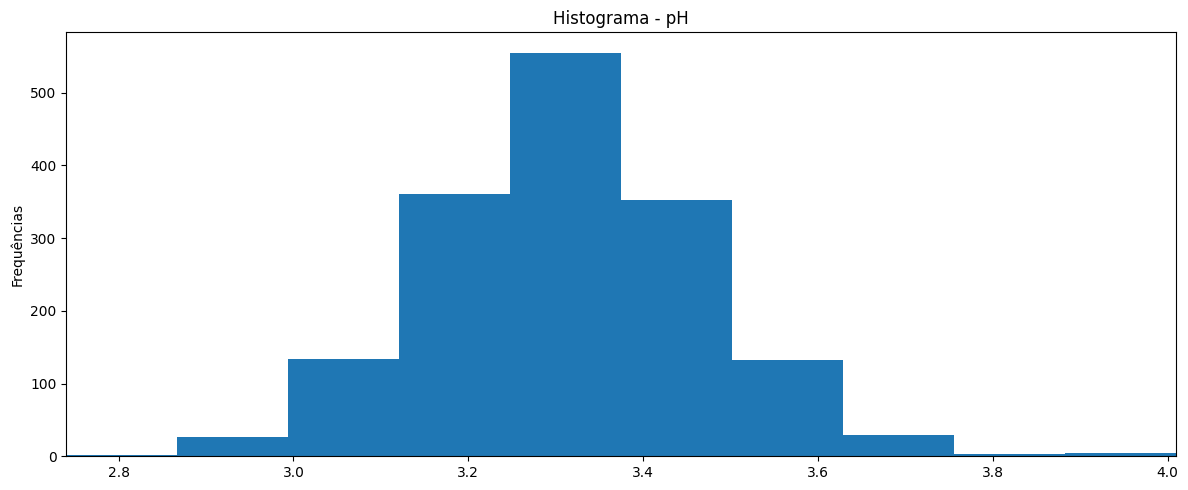

In [108]:
plt.figure(figsize=(12,5))

plt.hist(df['pH'])
plt.ylabel("Frequências")
plt.title('Histograma - pH')
plt.xlim(min(df['pH']), max(df['pH']))


plt.tight_layout()
plt.show()

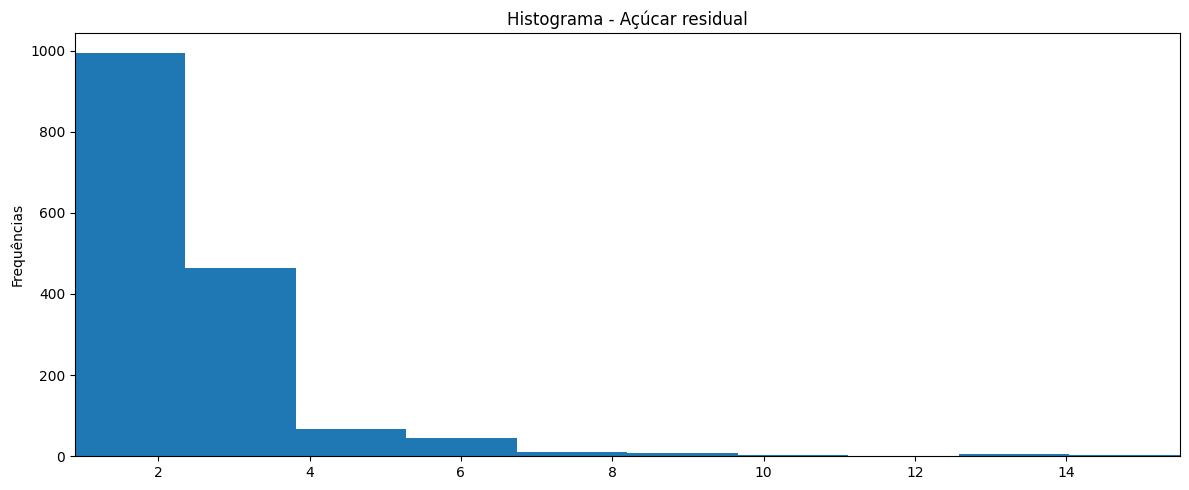

In [109]:
plt.figure(figsize=(12,5))

plt.hist(df['residual sugar'])
plt.ylabel("Frequências")
plt.title('Histograma - Açúcar residual')
plt.xlim(min(df['residual sugar']), max(df['residual sugar']))


plt.tight_layout()
plt.show()

Veja que a distribuição em relação ao pH é simétrica, ou seja, os dados parecem estar normalmente distribuídos em relação ao valor central. Já no caso do açúcar residual, a distribuição é assimétrica (à esquerda).

## Customizações no histograma

Assim como no gráfico de linhas, podemos fazer várias customizações no histograma. As mais comuns são as seguintes:

- Número de colunas (`bins`),
- Cor das barras (`facecolor`),
- Transperência da cor das barras (`alpha`),
- Cor do contorno das barras (`edgecolor`).

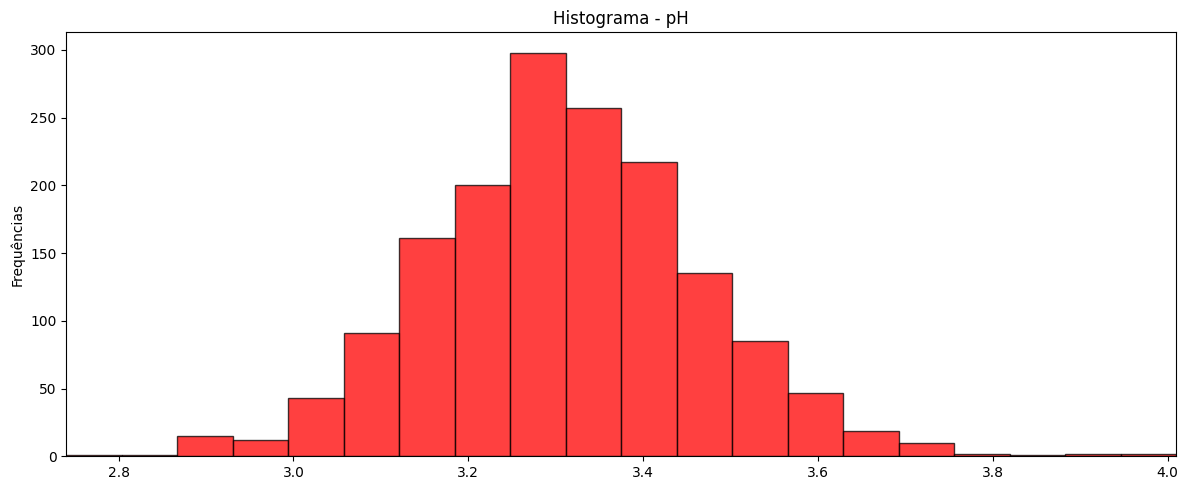

In [110]:
plt.figure(figsize=(12,5))

plt.hist(df['pH'], bins=20, facecolor='r', alpha=0.75, edgecolor='black')
plt.ylabel("Frequências")
plt.title('Histograma - pH')
plt.xlim(min(df['pH']), max(df['pH']))


plt.tight_layout()
plt.show()

Também podemos apresentar a densidade (frequência em termos relativos). Nesse caso, a soma das áreas do retêngulo é igual a 1.

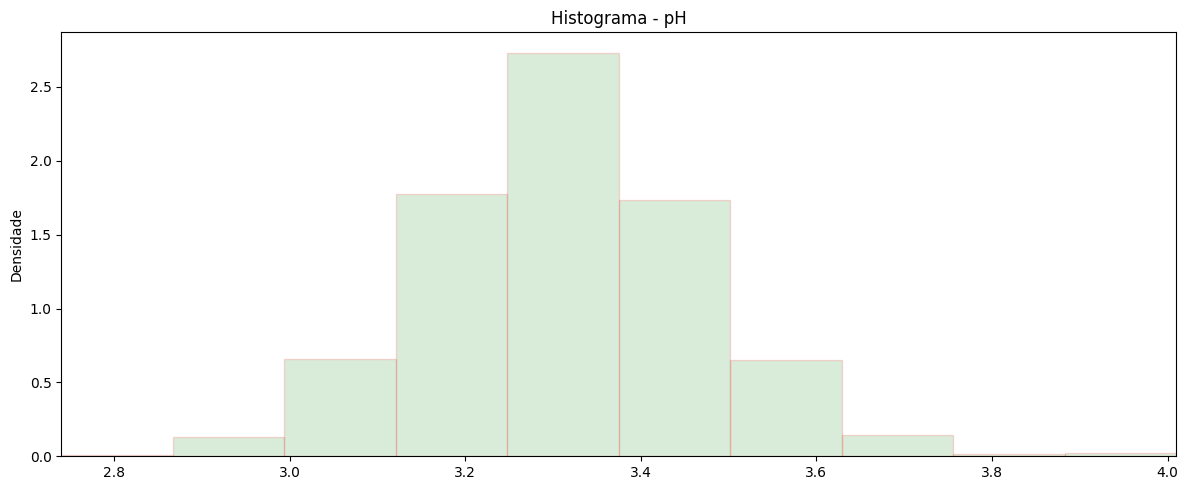

In [111]:
plt.figure(figsize=(12,5))

plt.hist(df['pH'], facecolor='g', alpha=0.15, edgecolor='red', density='True')
plt.ylabel("Densidade")
plt.title('Histograma - pH')
plt.xlim(min(df['pH']), max(df['pH']))


plt.tight_layout()
plt.show()

O uso da densidade é uma forma de normalizar os dados do histograma. É muito útil quando comparamos histogramas extraídos de dados diferentes, principalmente quando os mesmos possuem diferentes números de amostras (linhas).

Veja o exemplo seguinte.

In [112]:
# Tempo de vida útil de um aparelho fabricado por três companhias diferentes

link="https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_vida_util.csv"
dft=pd.read_csv(link)
dft.head()

,Marca A,Marca B,Marca C
0,63.534109,101.530780,91.591445
1,41.192427,62.104283,113.843593
2,69.094495,111.343226,100.701428
3,31.973171,41.912761,117.114409
4,35.141848,45.835008,93.970920


In [113]:
# Analisando o tamanho das amostras para cada marca
dft.describe()

,Marca A,Marca B,Marca C
count,100.000000,400.000000,200.000000
mean,48.199521,72.852862,102.911477
std,12.305807,22.253534,7.824430
min,30.167703,40.218575,90.470950
25%,37.973543,54.614383,96.573143
50%,46.210411,69.053242,101.417087
75%,56.557937,88.011825,108.870865
max,84.202414,162.056161,126.001420


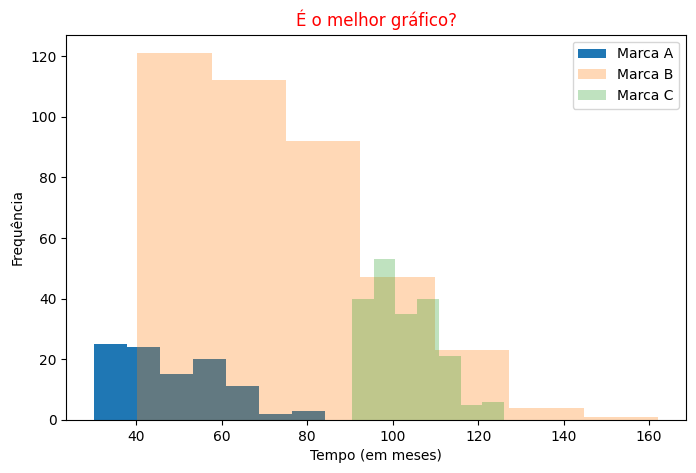

In [114]:
# Plotando o histograma com base nas frequências

plt.figure(figsize=(8,5))

plt.hist(dft["Marca A"], label="Marca A",bins=7)
plt.hist(dft["Marca B"],alpha=0.3,label="Marca B",bins=7)
plt.hist(dft["Marca C"],alpha=0.3, label="Marca C",bins=7)
plt.xlabel("Tempo (em meses)")
plt.ylabel("Frequência")
plt.title("É o melhor gráfico?",color="r")

plt.legend()
plt.show()

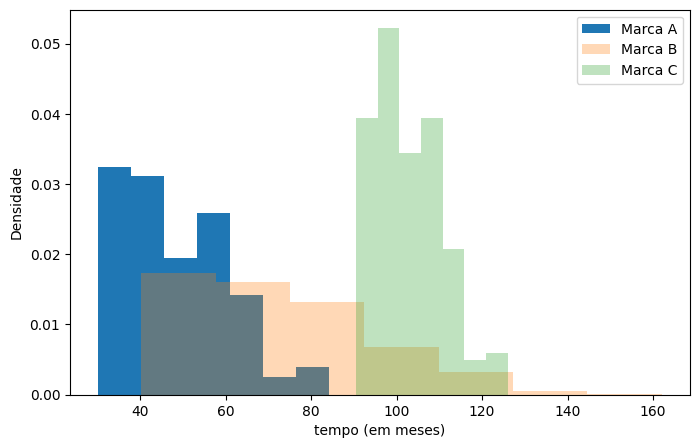

In [115]:
# É muito mais "correto" analisar o gráfico usando a densidade, uma vez que os dados podem ter diferentes números de amostras.

plt.figure(figsize=(8,5))

plt.hist(dft["Marca A"],density=True, label="Marca A",bins=7)
plt.hist(dft["Marca B"],alpha=0.3,density=True,label="Marca B",bins=7)
plt.hist(dft["Marca C"],alpha=0.3,density=True, label="Marca C",bins=7)
plt.xlabel("tempo (em meses)")
plt.ylabel("Densidade")

plt.legend()
plt.show()

## Usando a biblioteca Seaborn

Além do Matplotlib, também podemos usar a biblioteca Seaborn para imprimir gráficos no Python. Veja a seguir como ficam os comandos para plotar um histograma usando densidade (é o padrão do Seabonr!) usando essa biblioteca.

<ipython-input-116-c6ce4206909b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft["Marca A"])


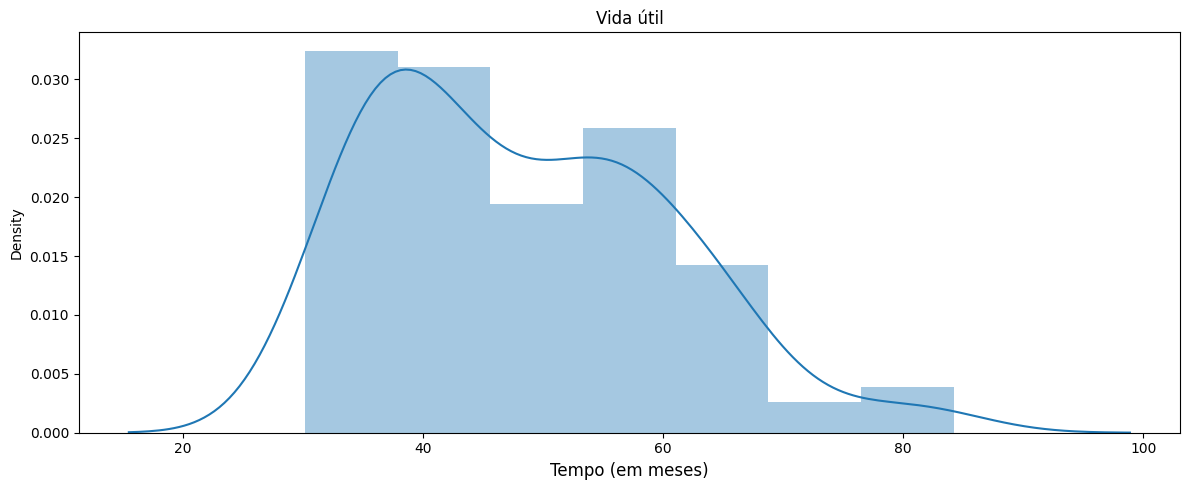

In [116]:
import seaborn as sns
plt.figure(figsize=(12,5))

sns.distplot(dft["Marca A"])
plt.title('Vida útil')
plt.xlabel("Tempo (em meses)", fontsize=12)

plt.tight_layout()

Note que o Seaborn também inclui uma curva aproximando a função de densidade de probabilidade. às vezes, é interessante apenas apresentar tal curva, para facilitar a visualização. Isso principalmente quando estamos comparando mais de um histograma.

<ipython-input-117-3378d39a08ee>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft["Marca A"],hist=False,label="Marca A")
<ipython-input-117-3378d39a08ee>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft["Marca B"],hist=False,label="Marca B")
<ipython-input-117-3378d39a0

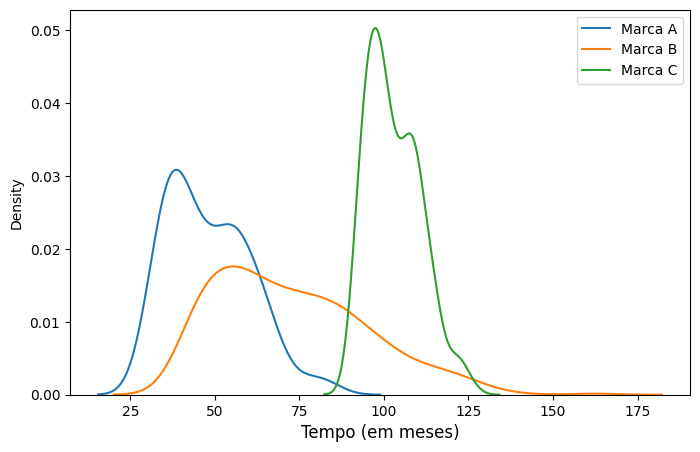

In [117]:
import seaborn as sns
plt.figure(figsize=(8,5))

sns.distplot(dft["Marca A"],hist=False,label="Marca A")
sns.distplot(dft["Marca B"],hist=False,label="Marca B")
sns.distplot(dft["Marca C"],hist=False,label="Marca C")

plt.xlabel("Tempo (em meses)", fontsize=12)
plt.legend()

plt.show()

# Boxplot

O Boxplot (ou diagrama de caixa) é uma ferramenta gráfica utilizada para ilustrar a distribuição de um conjunto de dados com base em cinco medidas principais:

- Valor mínimo desconsiderando outliers,
- Primeiro quartil (Q1),
- Mediana,
- Terceiro quartil (Q3),
- Valor máximo desconsiderando outliers.

Além desses valores, também podemos incluir em um gráfico com Boxplot os outliers, de forma a compreender quantos são e onde se encontram em relação ás demais medidas.

Por padrão, consideramos os valores de máximo e mínimo no boxplot como $ Max = Q3 + 1,5*AIQ $ e $ Min = Q1 - 1,5*AIQ $, onde $ AIQ = Q3 - Q1$ é a amplitude interquartil.


<img src='https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Aulas/Figuras/fig_graficos_boxplot.png' width="900">

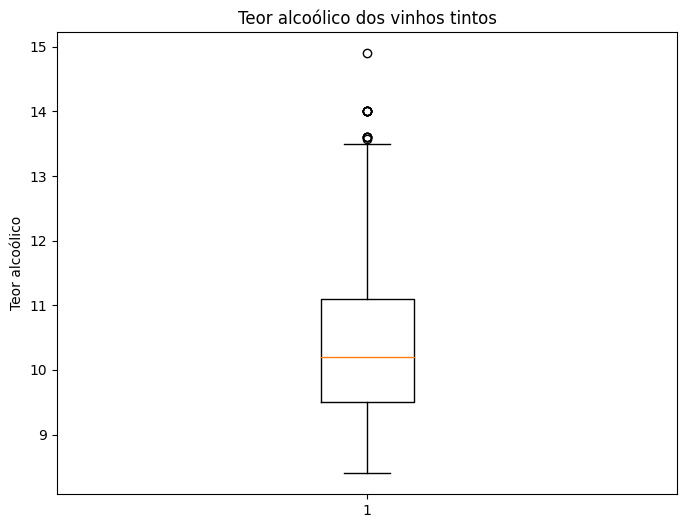

In [118]:
# Exemplo:

plt.figure(figsize=(8,6))

plt.boxplot(df["alcohol"])
plt.ylabel("Teor alcoólico")
plt.title("Teor alcoólico dos vinhos tintos")

plt.show()

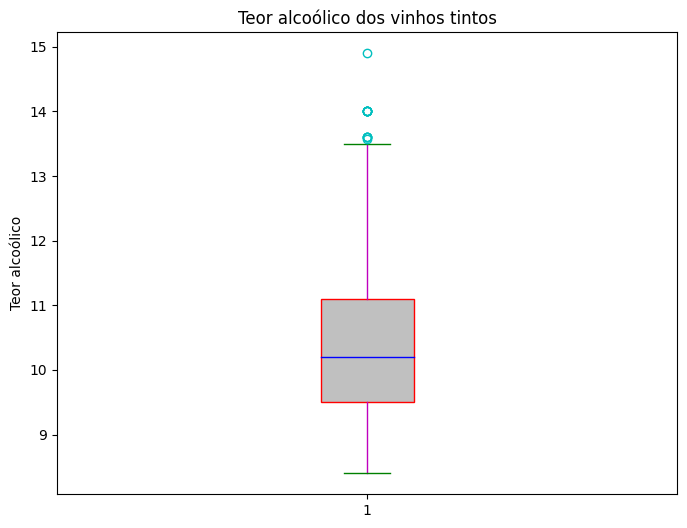

In [119]:
# Customizações

plt.figure(figsize=(8,6))

plt.boxplot(df["alcohol"], patch_artist=True,
            boxprops=dict(facecolor="silver", color="r"),
            medianprops=dict(color="blue"),
            capprops=dict(color="g"),
            whiskerprops=dict(color="m"),
            flierprops=dict( markeredgecolor="c"))
plt.ylabel("Teor alcoólico")
plt.title("Teor alcoólico dos vinhos tintos")
plt.show()

Em muitos casos, é interessante plotar mais de um boxplot um ao lado do outro para comparar distribuições de dados diferentes. Nesse caso, é recomendado utilizar a interface orientada a objetos.

Veja no exemplo a seguir a comparação em relação ao teor para vinhos considerados bons (*quality > 5*) e vinhos considerados ruins (*quality <= 5*).

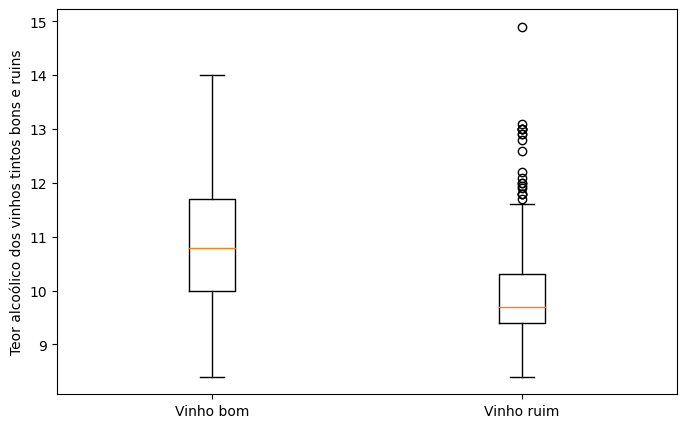

In [120]:
fig, ax = plt.subplots(figsize=(8,5))

plt.boxplot(df[df.quality > 5]["alcohol"], positions=[1])
plt.boxplot(df[df.quality <= 5]["alcohol"], positions=[2])
ax.set_xticklabels(['Vinho bom', 'Vinho ruim'])

plt.ylabel("Teor alcoólico dos vinhos tintos bons e ruins")
plt.show()

## Boxplot com o Seaborn

O uso do Seaborn para construir boxplots facilita, principalmente, quando comparamos distribuições de dados.

Veja como ficam os comandos para plotar os boxplots comparando vinhos bons e ruins de acordo com o teor alcoólico.

In [121]:
# Criando uma coluna de dados indicando com 1 os vinhos bons e 0 os vinhos ruins

df['quality_class'] = (df.quality > 5).astype(int)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


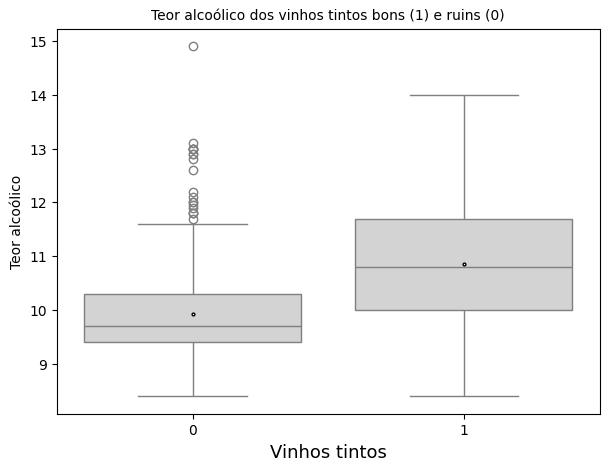

In [122]:
import seaborn as sns
plt.figure(figsize=(7,5))

sns.boxplot(x="quality_class", y="alcohol", data=df,color="lightgrey", linewidth=1.0, width=0.8,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"2"})
plt.ylabel("Teor alcoólico", fontsize=10)
plt.xlabel("Vinhos tintos", fontsize=13)
plt.title("Teor alcoólico dos vinhos tintos bons (1) e ruins (0)", fontsize=10)

plt.show()

# Gráfico de pizza

O gráfico de pizza (ou de setores) consiste em uma figura circular onde as parcelas do círculo (fatias da pizza) são proporcionais às frequências de cada categoria representadas por tais parcelas. Note que o ângulo de abertura de cada fatia é o que determina o gráfico de pizza.

Para ilustrar esse tipo de gráfico, vamos retomar o conjunto de dados [Bike Sharing](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [123]:
dados = pd.read_csv('https://raw.githubusercontent.com/guilhermepelegrina/Mackenzie/main/Datasets/data_bike_sharing_day.csv')
dados

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Lembre-se que a variável `weathersit` (situação do clima) possui as sequintes categorias: 1 - Claro, poucas nuvens ou parcialmente nublado; 2 - Com neblina + nublado, com neblina + nuvens carregadas, com neblina + poucas nuvens, com neblina; 3 - Neve fraca, Chuva fraca + tempestade + nuvens esparsas; 4 - Chuva forte + granizo + tempestade + neblina, neve + nevoiero.

Vamos representar a frequência que cada situação do clima aparece no conjuntoa aprtir de um gráfico de pizza.


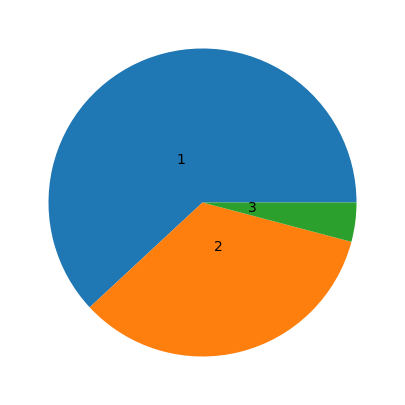

In [124]:
dados2 = dados[dados.yr == 0].groupby("weathersit")["weathersit"].count()

plt.figure(figsize=(10,5))
plt.pie(dados2,labels=dados2.index, labeldistance=0.3)
plt.show()

## Customizações

Também podemos customizar os gráficos. Algumas das opções são as seguintes:

- `labels`: Podemos inserir manualmente os nomes das categorias,

- `autopct`: Inclui as porcentagens de cada categoria (assim como o número de casa decimais),

- `colors`: Modifica as cores das fatias. Note que o número de cores inseridas precisa ser igual ao número de categorias,

- `explode`: Inclui uma distância entre a fatia associada ao valor inserido no comendo e o restante das fatias do gráfico,

- `shadow`: Insere um sombreado no gráfico.


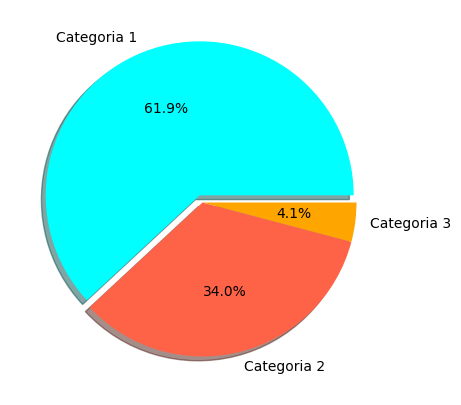

In [125]:
plt.figure(figsize=(10,5))
plt.pie(dados2, labels=['Categoria 1', "Categoria 2", "Categoria 3"], autopct='%1.1f%%', colors=['cyan','tomato', 'orange'], explode = (0.05, 0,0),shadow=True)
plt.show()